<a id='section1'></a>
## 1. Problem Statement


> Given a dataset of 5000 movies ranging from 1920s onwards to 2010s, perform Exploratory Data Analysis and find the trends/patterns.


<a id='section2'></a>
## 2. Introduction

> This dataset is obtianed from Kaggle. It contains approximately 5000 movies. This dataset contains information about the movies released in these years like gross revenue, director's name, duration, genres and IMDB score.

<a id='section3'></a>
### 3. Preparing the data for analysis

>We will perform Data Wrangling in this section. This is the preliminary step before data exploration 


In [266]:
#Importing necessary packages and reading the dataset in pandas dataframe
import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
movies = pd.read_csv("movie_metadata.csv")

In [267]:
#Setting the max limit for the columns and rows displyed on the screen
pd.set_option('display.max_columns', 30)
pd.set_option('display.max_rows', 50)
pd.set_option('display.width', 1000)

In [268]:
movies.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [269]:
movies.shape

(5043, 28)

In [270]:
movies.movie_title.nunique()

4917

>As the number of unique movie title is not equal to total number of rows, therfore there are some duplicates present in the dataset

In [271]:
#Checking for duplicate values in movie_title column
movies.movie_title.duplicated().any()

True

In [272]:
#Dropping the duplicate rows whose entries for all the columns are same but keeping the first one 
df = movies.drop_duplicates(keep='first',inplace=False)

In [273]:
df.shape

(4998, 28)

>Now Checking the movie_title column for unique entries

In [274]:
df.movie_title.nunique()

4917

> Still there is a difference in the unique values and the total number of rows

In [275]:
# Dropping the rows having same movie title and keeping the first one
df2=df.drop_duplicates(subset='movie_title',keep="first",inplace=False)

In [276]:
movies=df2

In [277]:
movies.shape

(4917, 28)

>###### Finally there are no duplicates in movie_title

In [278]:
#Checking the null values present in respective columns
movies.isnull().sum()

color                         19
director_name                102
num_critic_for_reviews        49
duration                      15
director_facebook_likes      102
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        863
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                152
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               300
budget                       484
title_year                   106
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 326
movie_facebook_likes           0
dtype: int64

In [279]:
#Calculating the missing values percentage
movies.isnull().mean().multiply(other=100)

color                         0.386414
director_name                 2.074436
num_critic_for_reviews        0.996543
duration                      0.305064
director_facebook_likes       2.074436
actor_3_facebook_likes        0.467765
actor_2_name                  0.264389
actor_1_facebook_likes        0.142363
gross                        17.551352
genres                        0.000000
actor_1_name                  0.142363
movie_title                   0.000000
num_voted_users               0.000000
cast_total_facebook_likes     0.000000
actor_3_name                  0.467765
facenumber_in_poster          0.264389
plot_keywords                 3.091316
movie_imdb_link               0.000000
num_user_for_reviews          0.427090
language                      0.244051
country                       0.101688
content_rating                6.101281
budget                        9.843400
title_year                    2.155786
actor_2_facebook_likes        0.264389
imdb_score               

>##### As we can see, The percentage of missing values for columns gross, budget are significant. 

### Pre Profiling Report

In [220]:
movies_profile = pandas_profiling.ProfileReport(movies)
movies_profile.to_file(output_file="movies_preprocessing2.html")

### Pre Processing

>###### Based on the pre profiling report, we have replaced the data with mean

In [280]:
#Replacing the data with mean
mean_gross = movies['gross'].mean()
movies['gross'].fillna(value=mean_gross, inplace=True)

In [281]:
#Checking the column for null values
movies['gross'].isnull().any()

False

In [282]:
mean_budget = movies['budget'].mean()
movies['budget'].fillna(value=mean_budget, inplace=True)

In [283]:
movies['budget'].isnull().any()

False

In [284]:
mean_ar = movies['aspect_ratio'].mean()
movies['aspect_ratio'].fillna(value=mean_ar, inplace=True)

In [286]:
#Replacing the null values in the content rating column as No rating
movies["content_rating"].fillna("NO Rating", inplace = True) 

>##### Dropping the rows which have less percentage of null values and which are not so important for data analysis


In [287]:
movies.dropna(subset=['color','director_name','num_critic_for_reviews','duration','director_facebook_likes','actor_3_facebook_likes','actor_2_name','actor_1_facebook_likes','actor_1_name','actor_3_name','facenumber_in_poster','plot_keywords','num_user_for_reviews','language','country','title_year','actor_2_facebook_likes'], inplace=True)

In [288]:
#Check for null values
movies.isnull().any()

color                        False
director_name                False
num_critic_for_reviews       False
duration                     False
director_facebook_likes      False
actor_3_facebook_likes       False
actor_2_name                 False
actor_1_facebook_likes       False
gross                        False
genres                       False
actor_1_name                 False
movie_title                  False
num_voted_users              False
cast_total_facebook_likes    False
actor_3_name                 False
facenumber_in_poster         False
plot_keywords                False
movie_imdb_link              False
num_user_for_reviews         False
language                     False
country                      False
content_rating               False
budget                       False
title_year                   False
actor_2_facebook_likes       False
imdb_score                   False
aspect_ratio                 False
movie_facebook_likes         False
dtype: bool

In [289]:
movies.shape

(4607, 28)

### Post Profiling

In [ ]:
movies_profile = pandas_profiling.ProfileReport(movies)
movies_profile.to_file(outputfile="movies_postprocessing.html")

In [290]:
#Checking the DataTypes of the columns
movies.dtypes

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

In [291]:
# Setting the Index of the dataframe to movie_title
movies.set_index('movie_title', inplace=True)

In [292]:
movies

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,,,,,,,
Avatar,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,7.605058e+08,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,2.370000e+08,2009.0,936.0,7.9,1.780000,33000
Pirates of the Caribbean: At World's End,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,3.094042e+08,Action|Adventure|Fantasy,Johnny Depp,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,3.000000e+08,2007.0,5000.0,7.1,2.350000,0
Spectre,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,2.000742e+08,Action|Adventure|Thriller,Christoph Waltz,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,2.450000e+08,2015.0,393.0,6.8,2.350000,85000
The Dark Knight Rises,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,4.481306e+08,Action|Thriller,Tom Hardy,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,2.500000e+08,2012.0,23000.0,8.5,2.350000,164000
John Carter,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,7.305868e+07,Action|Adventure|Sci-Fi,Daryl Sabara,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,2.637000e+08,2012.0,632.0,6.6,2.350000,24000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Cavite,Color,Neill Dela Llana,35.0,80.0,0.0,0.0,Edgar Tancangco,0.0,7.007100e+04,Thriller,Ian Gamazon,589,0,Quynn Ton,0.0,jihad|mindanao|philippines|security guard|squa...,http://www.imdb.com/title/tt0428303/?ref_=fn_t...,35.0,English,Philippines,Not Rated,7.000000e+03,2005.0,0.0,6.3,2.222267,74
El Mariachi,Color,Robert Rodriguez,56.0,81.0,0.0,6.0,Peter Marquardt,121.0,2.040920e+06,Action|Crime|Drama|Romance|Thriller,Carlos Gallardo,52055,147,Consuelo Gómez,0.0,assassin|death|guitar|gun|mariachi,http://www.imdb.com/title/tt0104815/?ref_=fn_t...,130.0,Spanish,USA,R,7.000000e+03,1992.0,20.0,6.9,1.370000,0
Newlyweds,Color,Edward Burns,14.0,95.0,0.0,133.0,Caitlin FitzGerald,296.0,4.584000e+03,Comedy|Drama,Kerry Bishé,1338,690,Daniella Pineda,1.0,written and directed by cast member,http://www.imdb.com/title/tt1880418/?ref_=fn_t...,14.0,English,USA,Not Rated,9.000000e+03,2011.0,205.0,6.4,2.222267,413


### Performing EDA
>In this section we are exploring the dataset by studying impact of different attributes

### Imapact of Duration on movies

In [313]:
movies.duration.describe()

count    4607.000000
mean      108.543955
std        22.569692
min        14.000000
25%        94.000000
50%       104.000000
75%       118.000000
max       330.000000
Name: duration, dtype: float64

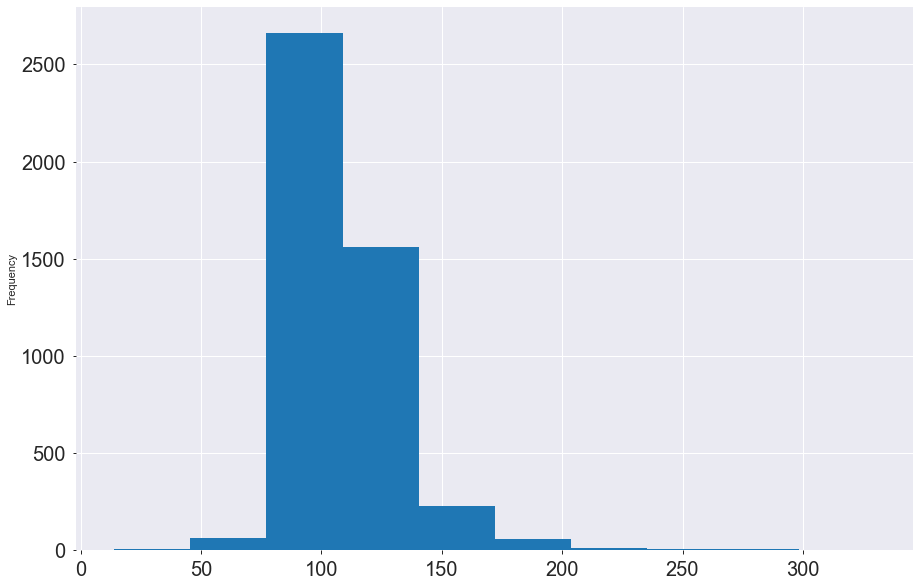

In [317]:
#plotting the distribution of duration column
movies.duration.plot.hist(fontsize=20,figsize=(15,10))

In [319]:
#Classifying movies into different categories based on their duration by using pandas cut method
duration_bin_edges = [50, 100, 150, 300]
duration_bin_names = ['Short', 'Medium', 'Long']
movies['duration_levels'] = pd.cut(movies.duration, duration_bin_edges, labels=duration_bin_names)
movies.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,duration_levels
movie_title,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Avatar,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760.505847,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,Long
Pirates of the Caribbean: At World's End,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309.404152,Action|Adventure|Fantasy,Johnny Depp,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,Long
Spectre,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200.074175,Action|Adventure|Thriller,Christoph Waltz,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,Medium
The Dark Knight Rises,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448.130642,Action|Thriller,Tom Hardy,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,Long
John Carter,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73.058679,Action|Adventure|Sci-Fi,Daryl Sabara,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,Medium


Text(0.5, 1.02, 'Movies Count of each Duration level')

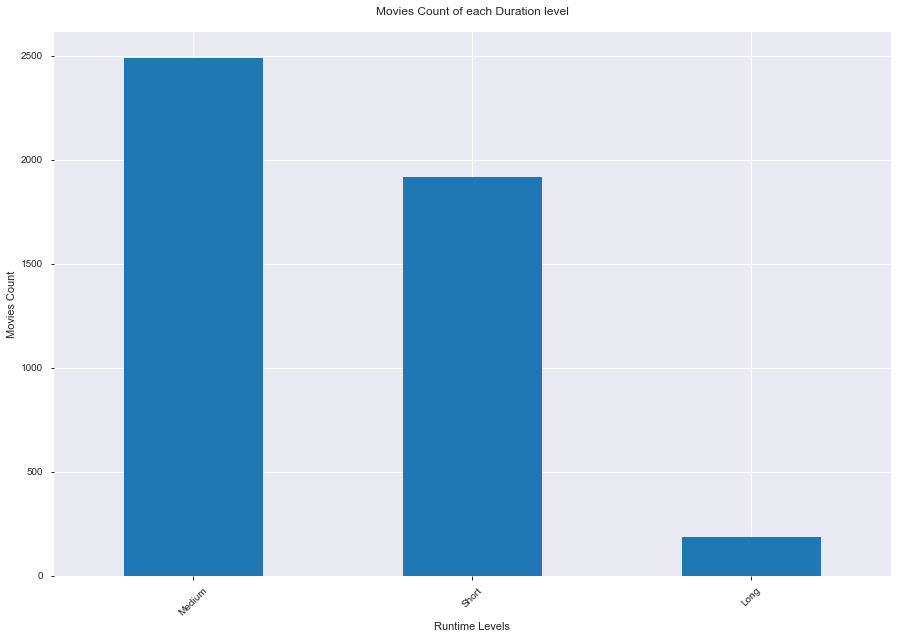

In [320]:
# Plot the count of different duration levels
ax = movies.duration_levels.value_counts().plot.bar(figsize=(15,10));
ax.set_ylabel('Movies Count');
ax.set_xlabel('Runtime Levels')
ax.set_xticklabels(movies.duration_levels.value_counts().index, rotation = 45);
ax.set_title('Movies Count of each Duration level', y=1.02)

#### Analysing duration with respect to gross

In [321]:
# Find out the Duration level that receives the highest mean gross, mean IMDB score
Duration_stats = movies.groupby('duration_levels')['gross', 'imdb_score'].mean()
Duration_stats

,gross,imdb_score
duration_levels,,
Short,37.101366,6.006410
Medium,52.644920,6.675221
Long,103.355911,7.450802


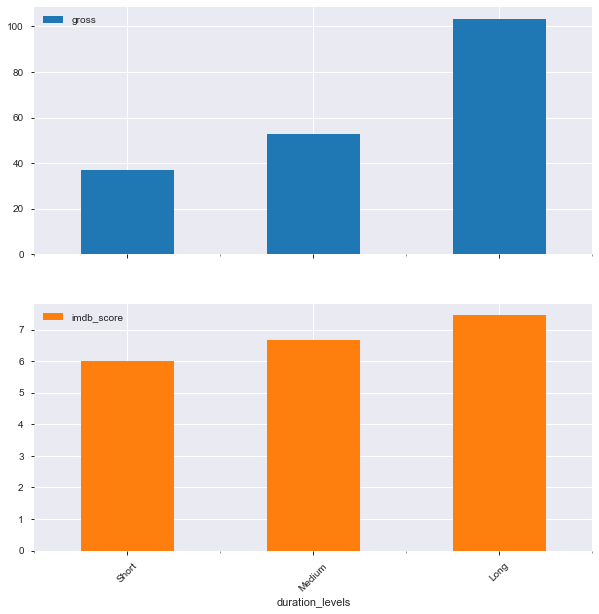

In [322]:
# Plot the above results
ax1, ax2= Duration_stats.plot.bar(subplots=True, figsize=(10,10));
ax1.set_title("")
ax2.set_title("")
ax2.set_xticklabels(Duration_stats.index, rotation = 45);

> #####  In general, movies that have Long duration (greater than 150 minutes) earns higher Gross and have higher IMDB score.

### Finding out the impact of directors on movies

In [298]:
#finding the number of movies directed by different directors
movies.director_name.value_counts().head(10)

Steven Spielberg     26
Woody Allen          22
Clint Eastwood       20
Martin Scorsese      20
Spike Lee            16
Ridley Scott         16
Renny Harlin         15
Steven Soderbergh    15
Oliver Stone         14
Tim Burton           14
Name: director_name, dtype: int64

In [300]:
#Changing the gross value in millions
movies['gross']=movies['gross'].multiply(other=0.000001)

##### Analysing directors by gross

In [308]:
#Calculating the average gross by top ten directors
gross_directors = movies.groupby('director_name').agg({'gross': 'mean'})
top_10_gross_directors = gross_directors.sort_values('gross', ascending=False)[:10]
top_10_gross_directors

,gross
director_name,
Lee Unkrich,414.984497
Chris Buck,400.736600
Joss Whedon,369.202360
Tim Miller,363.024263
George Lucas,348.283696
Kyle Balda,336.029560
Colin Trevorrow,328.092532
Yarrow Cheney,323.505540
Pete Docter,313.113780


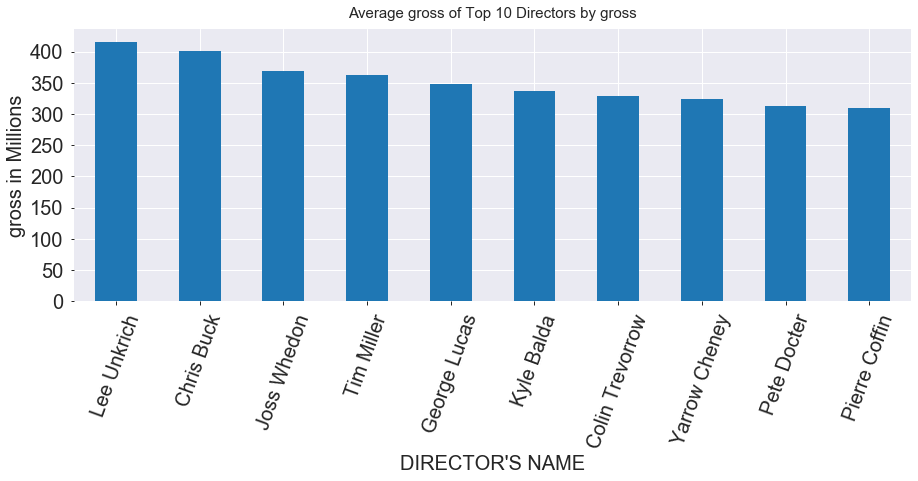

In [309]:
#Plotting graph b/w gross and top ten directors
ax = top_10_gross_directors['gross'].plot.bar(fontsize=20 ,figsize=(15,5));
ax.set_ylabel('gross in Millions',fontsize=20)
ax.set_xlabel("DIRECTOR'S NAME",fontsize=20)
ax.set_title('Average gross of Top 10 Directors by gross', y=1.02,fontsize=15)
ax.set_xticklabels(top_10_gross_directors.index, rotation = 70);

##### Analysing directors by IMDB Score

In [310]:
imdb_score_directors = movies.groupby('director_name').agg({'imdb_score': 'mean'})
top_10_imdb_score_directors = imdb_score_directors.sort_values('imdb_score', ascending=False)[:10]
top_10_imdb_score_directors

,imdb_score
director_name,
Sadyk Sher-Niyaz,8.700
Charles Chaplin,8.600
Damien Chazelle,8.500
Ron Fricke,8.500
Raja Menon,8.500
Majid Majidi,8.500
Sergio Leone,8.475
Tony Kaye,8.450
Christopher Nolan,8.425


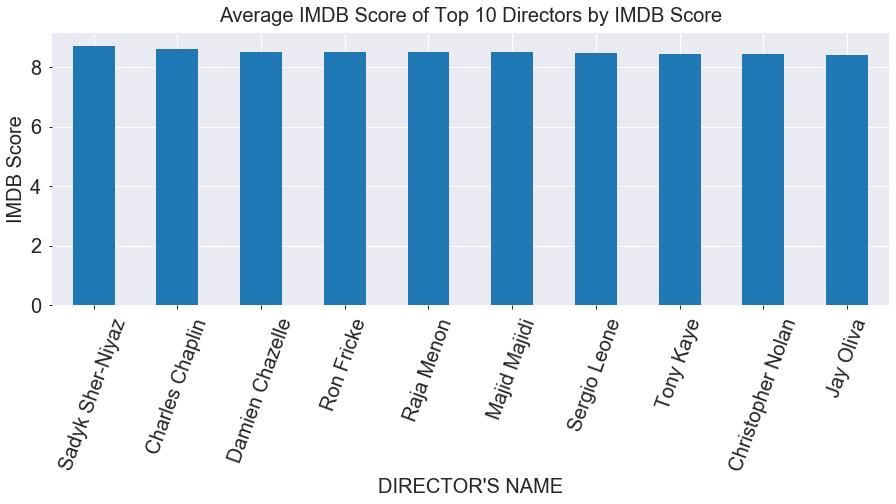

In [312]:
#Plotting the result
ax = top_10_imdb_score_directors['imdb_score'].plot.bar(fontsize=20 ,figsize=(15,5));
ax.set_ylabel('IMDB Score',fontsize=20)
ax.set_xlabel("DIRECTOR'S NAME",fontsize=20)
ax.set_title('Average IMDB Score of Top 10 Directors by IMDB Score', y=1.02,fontsize=20)
ax.set_xticklabels(top_10_imdb_score_directors.index, rotation = 70);

###  Analysing the number of movies over the years 

In [153]:
movies_year = movies.groupby('title_year')['movie_imdb_link'].count()

In [154]:
movies_year

title_year
1927.0      1
1929.0      2
1930.0      1
1932.0      1
1933.0      2
         ... 
2012.0    191
2013.0    192
2014.0    184
2015.0    152
2016.0     72
Name: movie_imdb_link, Length: 88, dtype: int64

Text(0.5, 0, 'Title year')

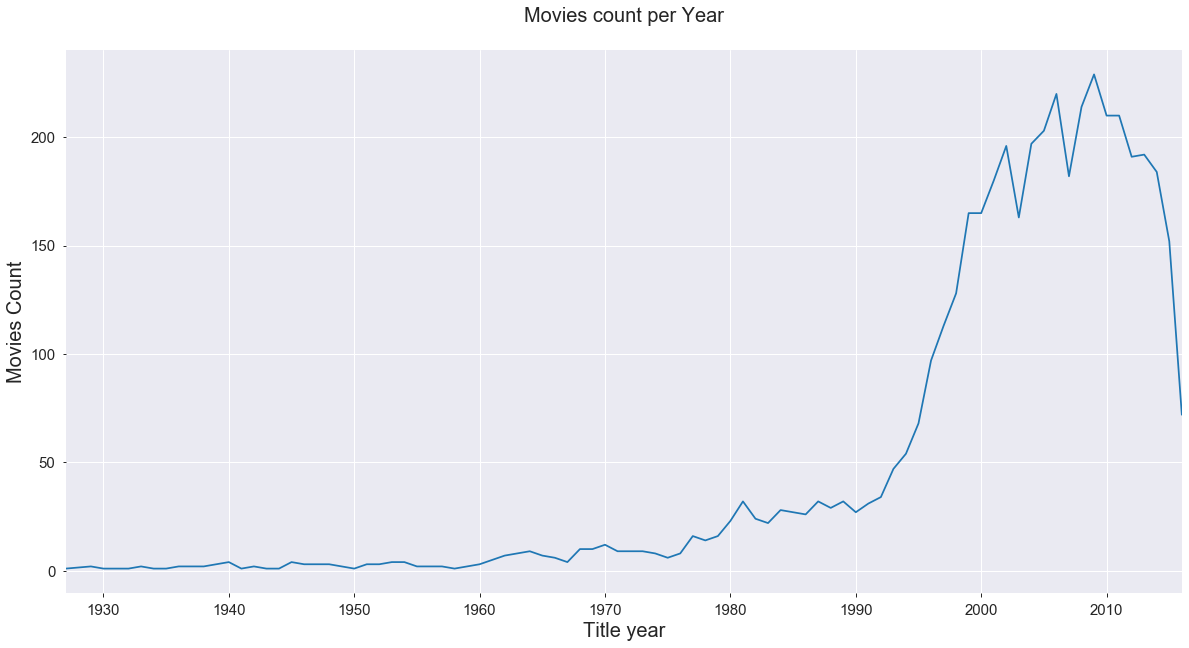

In [333]:
# Plot the movies count per year
ax = movies_year.plot.line(fontsize=15,figsize=(20,10));
ax.set_title('Movies count per Year', y=1.04,fontsize=20)
ax.set_ylabel('Movies Count',fontsize=20)
ax.set_xlabel('Title year',fontsize=20)

> ##### We can observe from the graph that the number of movies are increasing year by year.


#### Analysing the revenue from movies over the years

In [334]:
movies_gross = movies.groupby('title_year')['gross'].sum()

In [335]:
movies_gross

title_year
1927.0        0.026435
1929.0        2.817950
1930.0       47.644515
1932.0       47.644515
1933.0       49.944515
              ...     
2012.0    11059.012118
2013.0    11717.125678
2014.0    12237.486696
2015.0    10862.304336
2016.0     5573.854380
Name: gross, Length: 88, dtype: float64

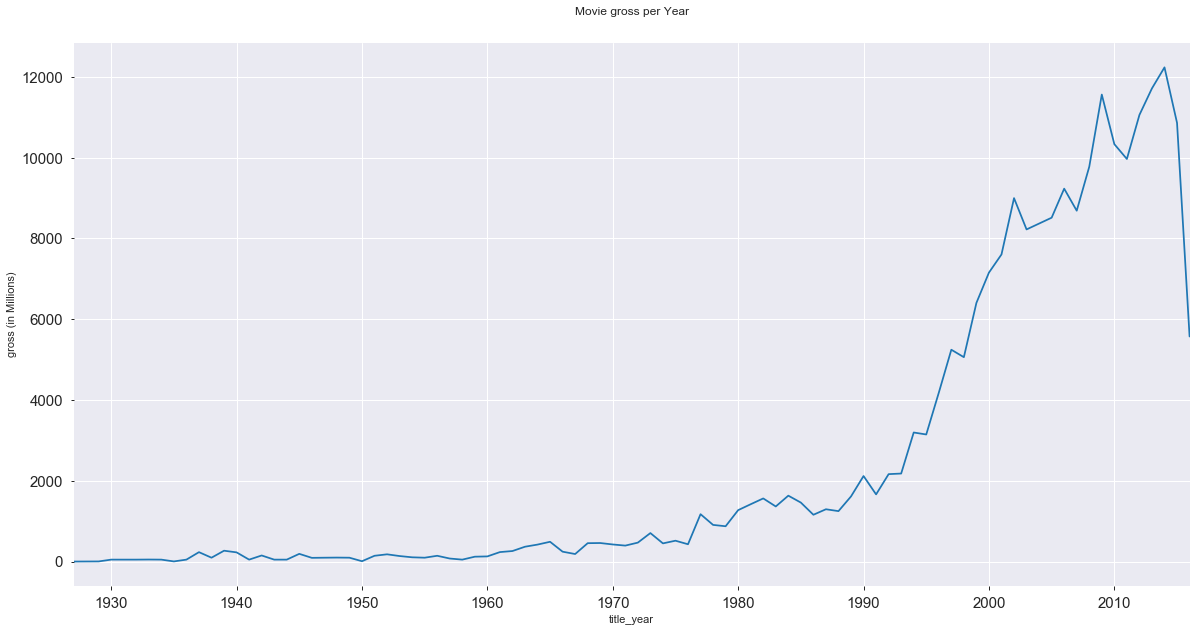

In [337]:
# Plot the Gross for each year
ax = movies_gross.plot.line(fontsize=15,figsize=(20,10));
ax.set_title('Movie gross per Year', y=1.04)
ax.set_ylabel('gross (in Millions)');

> ##### The gross from movies over year is showing an upward trend.

#### Analysing the average gross of the movies over the years

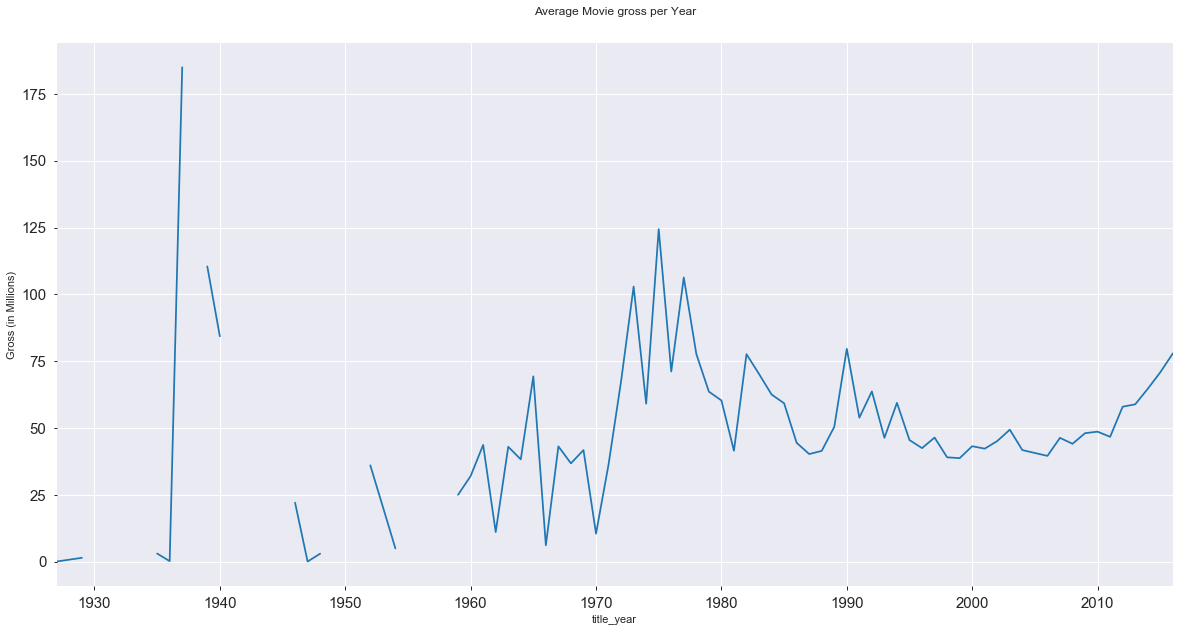

In [168]:
movies_gross_avg = movies.groupby('title_year')['gross'].mean()
ax = movies_gross_avg.plot.line(fontsize=15,figsize=(20,10));
ax.set_title('Average Movie gross per Year', y=1.04)
ax.set_ylabel('Gross (in Millions)');

> ##### 1.We can observe that gross of movies in early 90's is much higher than the gross in recent years this is because of the fact the total number of movies released per year is increasing. This trend indicates, more producers are coming into the industry and there is huge competition in the industry. As a result, in a year, multiple movies gets released around the same time and the gross gets distributed among them. So the average gross of movies in a year also decreases.

> ##### 2. And also we have discontinuiy in our graph becuase the data for the movies of those years is not in our dataset.

####  Finding the Directors who are more active in terms of directing more movies. Among them we need to find out directors who earn more gross and IMDB score 

In [338]:
#List of all the active directors with their movie count
most_active_directors = movies['director_name'].value_counts()[movies['director_name'].value_counts() >=10]
most_active_directors


Steven Spielberg        26
Woody Allen             22
Clint Eastwood          20
Martin Scorsese         20
Spike Lee               16
Ridley Scott            16
Renny Harlin            15
Steven Soderbergh       15
Oliver Stone            14
Tim Burton              14
Joel Schumacher         13
Ron Howard              13
Barry Levinson          13
Robert Rodriguez        13
Robert Zemeckis         13
Michael Bay             12
Brian De Palma          12
Kevin Smith             12
Tony Scott              12
Richard Donner          11
Francis Ford Coppola    11
Richard Linklater       11
Sam Raimi               11
Shawn Levy              11
Rob Reiner              11
Chris Columbus          11
Stephen Frears          10
David Fincher           10
Bobby Farrelly          10
Paul W.S. Anderson      10
John Carpenter          10
Wes Craven              10
John McTiernan          10
Name: director_name, dtype: int64

In [339]:
active_director_movies = movies[movies.director_name.isin(most_active_directors.index.tolist())]
active_director_movies

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,duration_levels,genres_count
movie_title,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Spider-Man 3,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336.530303,Action|Adventure|Romance,J.K. Simmons,383056,46055,Kirsten Dunst,0.0,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,2.580000e+08,2007.0,11000.0,6.2,2.35,0,Long,3
Robin Hood,Color,Ridley Scott,343.0,156.0,0.0,738.0,William Hurt,891.0,105.219735,Action|Adventure|Drama|History,Mark Addy,211765,3244,Scott Grimes,0.0,1190s|archer|england|king of england|robin hood,http://www.imdb.com/title/tt0955308/?ref_=fn_t...,546.0,English,USA,PG-13,2.000000e+08,2010.0,882.0,6.7,2.35,17000,Long,4
Spider-Man 2,Color,Sam Raimi,300.0,135.0,0.0,4000.0,James Franco,24000.0,373.377893,Action|Adventure|Fantasy|Romance,J.K. Simmons,411164,43388,Kirsten Dunst,1.0,death|doctor|scientist|super villain|tentacle,http://www.imdb.com/title/tt0316654/?ref_=fn_t...,1303.0,English,USA,PG-13,2.000000e+08,2004.0,11000.0,7.3,2.35,0,Medium,4
Alice in Wonderland,Color,Tim Burton,451.0,108.0,13000.0,11000.0,Alan Rickman,40000.0,334.185206,Adventure|Family|Fantasy,Johnny Depp,306320,79957,Anne Hathaway,0.0,alice in wonderland|mistaking reality for drea...,http://www.imdb.com/title/tt1014759/?ref_=fn_t...,736.0,English,USA,PG,2.000000e+08,2010.0,25000.0,6.5,1.85,24000,Medium,3
Transformers: Revenge of the Fallen,Color,Michael Bay,366.0,150.0,0.0,464.0,Kevin Dunn,894.0,402.076689,Action|Adventure|Sci-Fi,Glenn Morshower,323207,3218,Ramon Rodriguez,0.0,autobot|decepticon|machine|sun|symbol,http://www.imdb.com/title/tt1055369/?ref_=fn_t...,1439.0,English,USA,PG-13,2.000000e+08,2009.0,581.0,6.0,2.35,0,Medium,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
She's Gotta Have It,Black and White,Spike Lee,26.0,88.0,0.0,46.0,Joie Lee,539.0,7.137502,Comedy|Romance,S. Epatha Merkerson,4769,708,Tracy Camilla Johns,0.0,female nudity|male model|nudity|rite of passag...,http://www.imdb.com/title/tt0091939/?ref_=fn_t...,26.0,English,USA,R,1.750000e+05,1986.0,53.0,6.5,1.85,406,Short,2
The Last Waltz,Color,Martin Scorsese,71.0,117.0,17000.0,476.0,Levon Helm,725.0,0.321952,Documentary|Music,Ringo Starr,12611,2783,Bob Dylan,0.0,band|final concert|guitar|interview|thanksgiving,http://www.imdb.com/title/tt0077838/?ref_=fn_t...,113.0,English,USA,PG,3.654150e+07,1978.0,572.0,8.2,1.85,0,Medium,2
Clerks,Black and White,Kevin Smith,136.0,102.0,0.0,216.0,Brian O'Halloran,898.0,3.151130,Comedy,Jason Mewes,181749,2103,Jeff Anderson,4.0,clerk|friend|hockey|video|video store,http://www.imdb.com/title/tt0109445/?ref_=fn_t...,615.0,English,USA,R,2.300000e+05,1994.0,657.0,7.8,1.37,0,Medium,1


In [340]:
# Find out the Average Gross and IMDB score of movies directed by the above Directors
active_director_stats = active_director_movies.groupby('director_name')['gross', 'imdb_score'].mean()
active_director_stats

,gross,imdb_score
director_name,,
Barry Levinson,47.977634,6.576923
Bobby Farrelly,62.790962,6.130000
Brian De Palma,49.677441,6.683333
Chris Columbus,147.155239,6.654545
Clint Eastwood,71.298281,7.225000
David Fincher,86.390452,7.750000
Francis Ford Coppola,59.468128,7.418182
Joel Schumacher,60.861436,6.407692
John Carpenter,19.995574,6.730000


In [341]:
# top 10 active directors by average gross
top_10_active_directors_by_revenue = active_director_stats.sort_values('gross', ascending=False)
top_10_active_directors_by_revenue[:10]

,gross,imdb_score
director_name,,
Michael Bay,182.953626,6.616667
Steven Spielberg,160.072216,7.480769
Chris Columbus,147.155239,6.654545
Sam Raimi,138.705485,7.018182
Robert Zemeckis,124.562239,7.307692
Tim Burton,111.219895,7.050000
Ron Howard,104.837831,6.930769
Shawn Levy,102.704635,6.090909
David Fincher,86.390452,7.750000


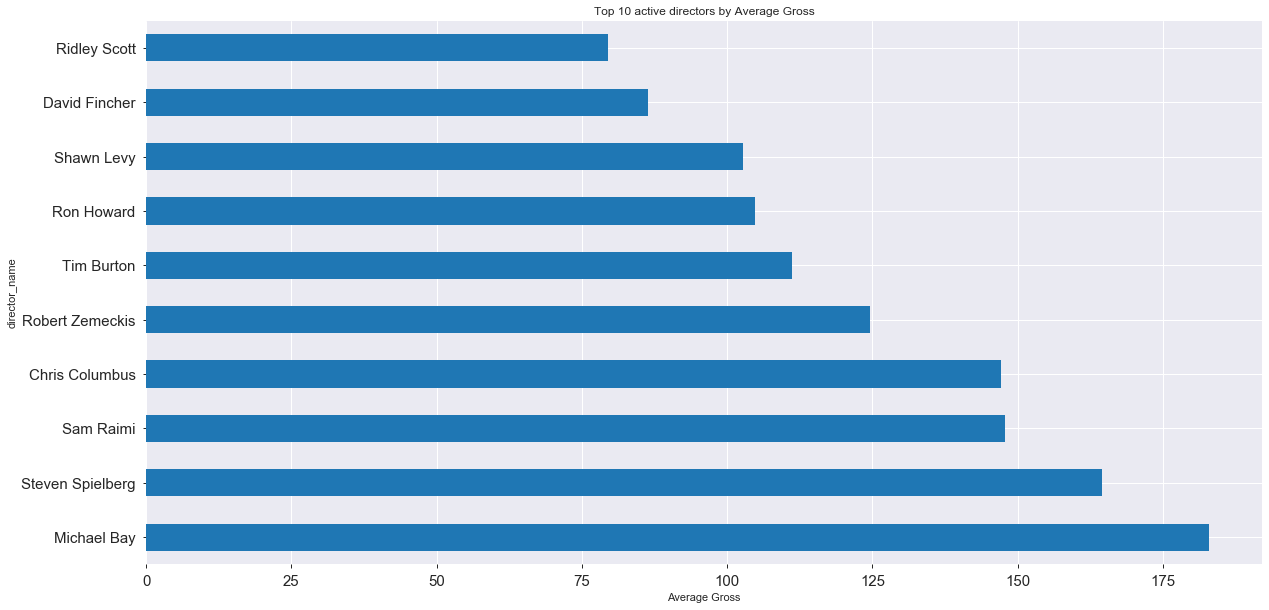

In [184]:
ax = top_10_active_directors_by_revenue[:10].gross.plot.barh(fontsize=15,figsize=(20,10));
ax.set_title("Top 10 active directors by Average Gross")
ax.set_xlabel('Average Gross');

In [342]:
# top 10 active directors by average IMDB score
top_10_active_directors_by_rating = active_director_stats.sort_values('imdb_score', ascending=False)
top_10_active_directors_by_rating[:10]

,gross,imdb_score
director_name,,
David Fincher,86.390452,7.750000
Martin Scorsese,50.778808,7.660000
Steven Spielberg,160.072216,7.480769
Francis Ford Coppola,59.468128,7.418182
Richard Linklater,14.664906,7.327273
Robert Zemeckis,124.562239,7.307692
Clint Eastwood,71.298281,7.225000
Ridley Scott,79.547790,7.131250
Stephen Frears,27.886573,7.070000


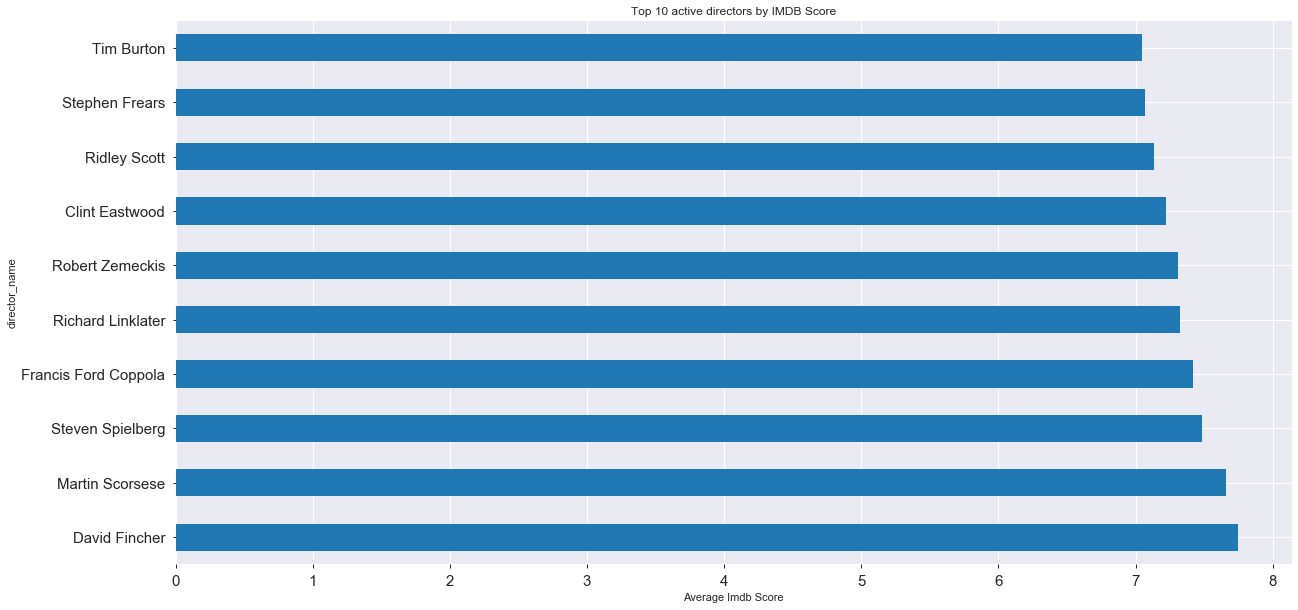

In [343]:
ax = top_10_active_directors_by_rating[:10].imdb_score.plot.barh(fontsize=15,figsize=(20,10));
ax.set_title("Top 10 active directors by IMDB Score")
ax.set_xlabel('Average Imdb Score');

### Finding out the impact of genres on movies

In [323]:
# Counting number of genres in a movie separated by '|' in the genre coloumn
movies['genres_count'] = movies.genres.str.split('|').str.len()

In [130]:
movies.genres_count.head()

movie_title
Avatar                                       4
Pirates of the Caribbean: At World's End     3
Spectre                                      3
The Dark Knight Rises                        2
John Carter                                  3
Name: genres_count, dtype: int64

In [324]:
# Calculate the Average Gross, IMDB score of movies based on the Genre_count
genre_count_stats = movies.groupby('genres_count')['gross', 'imdb_score'].mean()
genre_count_stats

,gross,imdb_score
genres_count,,
1,32.634565,6.292789
2,38.148171,6.435605
3,49.434903,6.488748
4,58.556825,6.446221
5,66.655668,6.297568
6,82.513174,6.463235
7,96.132182,6.594444
8,27.613988,5.966667


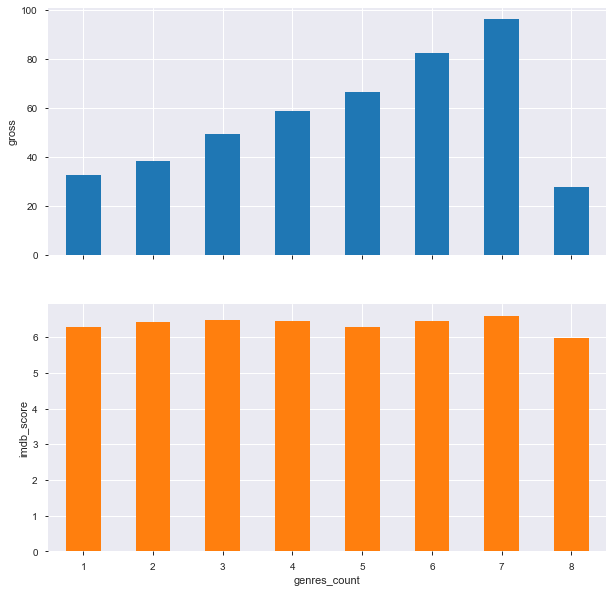

In [325]:
# Plot the results above
ax1, ax2= genre_count_stats.plot.bar(subplots=True);
fig = ax1.get_figure()
fig.set_size_inches(10, 10)
ax1.set_ylabel("gross")
ax1.legend("")
ax1.set_title("")
ax2.set_ylabel("imdb_score")
ax2.legend("")
ax2.set_title("")
ax2.set_xticklabels(genre_count_stats.index, rotation = 0.05);

> ##### 1. According to our dataset we can observe that movies with 7 genres have higher gross than movies with fewer number of genres but there is a dramatic decrease in the gross when the genre count goes from 7 to 8.
> ##### 2. Interestingly, the number of Genres in a movie does not impact IMDB Score significantly. However the IMDB Score are on the rise when Genre count increases. 


#### Finding movies that have higher gross and IMDB score

In [326]:
#Since we know that a Genre count of 7 brings the best out a movie
genre_7_df = movies[movies.genres_count == 7]

In [132]:
genre_7_df

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,duration_levels,genres_count
movie_title,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Tangled,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200.807262,Adventure|Animation|Comedy|Family|Fantasy|Musi...,Brad Garrett,294810,2036,M.C. Gainey,1.0,17th century|based on fairy tale|disney|flower...,http://www.imdb.com/title/tt0398286/?ref_=fn_t...,387.0,English,USA,PG,2.600000e+08,2010.0,553.0,7.8,1.85,29000,Short,7
Big Hero 6,Color,Don Hall,384.0,102.0,38.0,562.0,Daniel Henney,756.0,222.487711,Action|Adventure|Animation|Comedy|Drama|Family...,Damon Wayans Jr.,279093,2963,Abraham Benrubi,0.0,high tech|martial arts|masked man|robot|superhero,http://www.imdb.com/title/tt2245084/?ref_=fn_t...,433.0,English,USA,PG,1.650000e+08,2014.0,719.0,7.9,2.39,41000,Medium,7
Alexander,Color,Oliver Stone,248.0,206.0,0.0,591.0,Angelina Jolie Pitt,12000.0,34.293771,Action|Adventure|Biography|Drama|History|Roman...,Anthony Hopkins,138863,24598,Brian Blessed,3.0,ancient greece|conquest|greek|greek myth|king,http://www.imdb.com/title/tt0346491/?ref_=fn_t...,1390.0,English,Germany,R,1.550000e+08,2004.0,11000.0,5.5,2.35,0,Long,7
G-Force,Color,Hoyt Yeatman,145.0,88.0,12.0,182.0,Piper Mackenzie Harris,730.0,119.420252,Action|Adventure|Animation|Comedy|Family|Fanta...,Kelli Garner,33042,2217,Niecy Nash,0.0,fbi director|guinea pig|household appliance|se...,http://www.imdb.com/title/tt0436339/?ref_=fn_t...,90.0,English,USA,PG,1.500000e+08,2009.0,607.0,5.1,2.35,0,Short,7
Men in Black II,Color,Barry Sonnenfeld,208.0,88.0,188.0,826.0,Rosario Dawson,10000.0,190.418803,Action|Adventure|Comedy|Family|Fantasy|Mystery...,Will Smith,270207,14823,Rip Torn,2.0,alien|lingerie|lingerie model|m.i.b.|pug,http://www.imdb.com/title/tt0120912/?ref_=fn_t...,606.0,English,USA,PG-13,1.400000e+08,2002.0,3000.0,6.1,1.85,2000,Short,7
Lilo & Stitch,Color,Dean DeBlois,180.0,85.0,255.0,443.0,Jason Scott Lee,1000.0,145.771527,Adventure|Animation|Comedy|Drama|Family|Fantas...,Tia Carrere,117212,3112,David Ogden Stiers,0.0,alien|escape|fugitive|hawaii|social worker,http://www.imdb.com/title/tt0275847/?ref_=fn_t...,367.0,English,USA,PG,8.000000e+07,2002.0,533.0,7.2,1.66,0,Short,7
Space Jam,Color,Joe Pytka,46.0,88.0,30.0,366.0,Wayne Knight,13000.0,90.443603,Adventure|Animation|Comedy|Family|Fantasy|Sci-...,Bill Murray,112167,15001,Michael Jordan,1.0,alien|basketball|basketball game|cult film|mon...,http://www.imdb.com/title/tt0117705/?ref_=fn_t...,123.0,English,USA,PG,8.000000e+07,1996.0,967.0,6.3,1.77,0,Short,7
Osmosis Jones,Color,Bobby Farrelly,81.0,95.0,101.0,443.0,Brandy Norwood,2000.0,13.596911,Action|Adventure|Animation|Comedy|Crime|Family...,Ron Howard,25572,3734,David Hyde Pierce,0.0,blood|body|egg|virus|white blood cell,http://www.imdb.com/title/tt0181739/?ref_=fn_t...,123.0,English,USA,PG,7.000000e+07,2001.0,509.0,6.2,2.35,2000,Short,7
The Prince of Egypt,Color,Brenda Chapman,120.0,99.0,59.0,145.0,Aria Noelle Curzon,770.0,101.217900,Adventure|Animation|Biography|Drama|Family|Fan...,Martin Short,91093,1195,Eden Riegel,2.0,ancient egypt|hebrew|nudity|pharaoh|title dire...,http://www.imdb.com/title/tt0120794/?ref_=fn_t...,353.0,English,USA,PG,7.000000e+07,1998.0,263.0,7.0,1.85,0,Short,7


In [133]:
genre_7_df = genre_7_df.groupby('genres')['gross', 'imdb_score'].mean()

In [134]:
genre_7_df

,gross,imdb_score
genres,,
Action|Adventure|Animation|Comedy|Crime|Family|Fantasy,13.596911,6.20
Action|Adventure|Animation|Comedy|Drama|Family|Sci-Fi,122.823508,7.95
Action|Adventure|Animation|Comedy|Family|Fantasy|Sci-Fi,86.776424,5.70
Action|Adventure|Animation|Drama|Mystery|Sci-Fi|Thriller,31.743332,7.10
Action|Adventure|Biography|Drama|History|Romance|War,34.293771,5.50
Action|Adventure|Comedy|Crime|Family|Romance|Thriller,47.285499,5.00
Action|Adventure|Comedy|Family|Fantasy|Mystery|Sci-Fi,190.418803,6.10
Action|Animation|Fantasy|Horror|Mystery|Sci-Fi|Thriller,NaN,5.70
Adventure|Animation|Biography|Drama|Family|Fantasy|Musical,101.217900,7.00


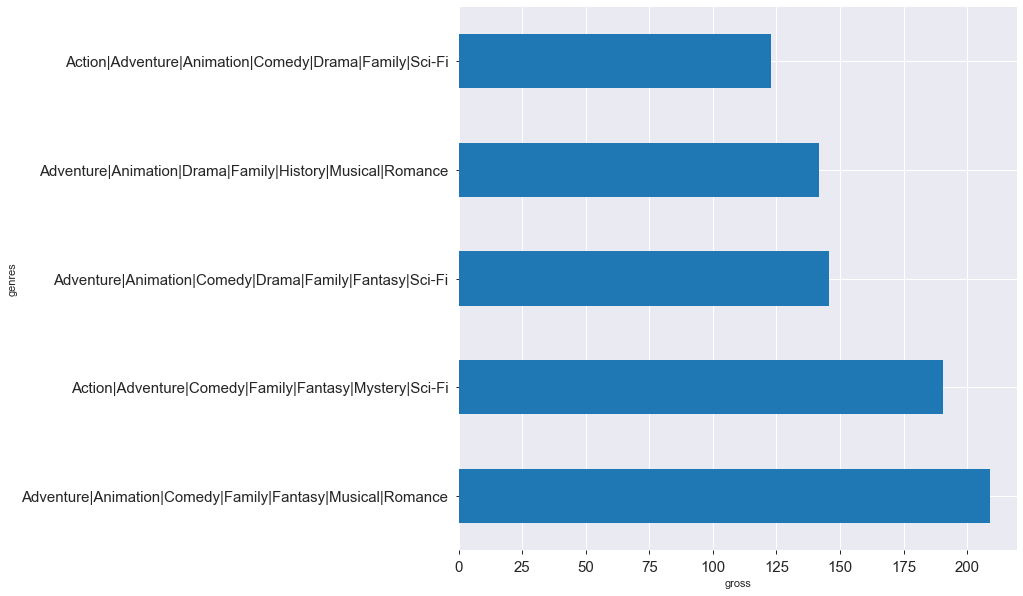

In [138]:
ax = genre_7_df.gross.sort_values(ascending=False).head(5).plot.barh(fontsize=15,figsize=(10,10));
ax.set_xlabel('gross');

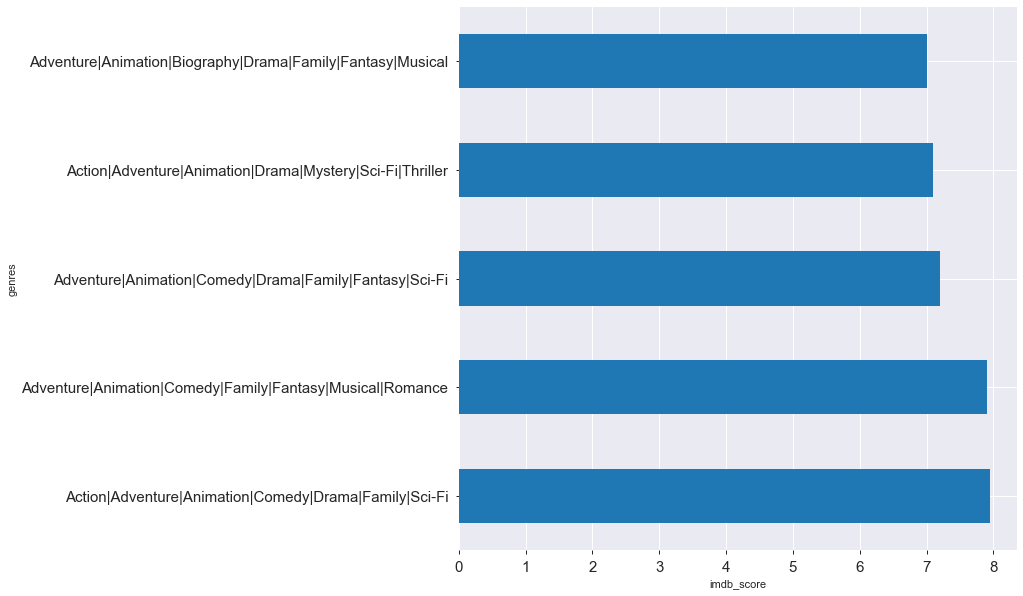

In [141]:
ax = genre_7_df.imdb_score.sort_values(ascending=False).head(5).plot.barh(fontsize=15,figsize=(10,10));
ax.set_xlabel('imdb_score');

> ##### 1. The combination of Genres: Adventure,Animation,Comedy,Family,Fantasy,Musical,Romance produces the highest Revenue.
> ##### 2. The combination of Genres: Action,Adventure,Animation,Comedy,Drama,Family,Sci-Fi produces the highest IMDB score.

## Conclusion

> We can see the impact of directors, duration, genres on movies, we can conclude these factors do affect the movies which can also be seen from the analysis over years